In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_curve, auc

In [10]:
# Imbalance techniques
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [11]:
matches = pd.read_csv("../data/quark_all.csv")
data = pd.read_csv("../data/quark_cache_all.csv")

In [67]:
matches

,chi_squared,yu11,yu12,yu13,yu21,yu22,yu23,yu31,yu32,yu33,...,pd33,cL1,cL2,cL3,cu1,cu2,cu3,cd1,cd2,cd3
0,0.159273,0.059669,0.825600,0.238537,0.023539,0.410516,0.120676,1.294718,2.300957,3.989085,...,1.336079,0.349534,0.778234,0.691859,0.833658,0.371131,0.162815,0.136267,0.994726,0.264156
1,13.116104,0.110574,0.197002,0.170535,0.207216,0.156741,0.059796,2.390812,3.984866,3.990957,...,1.097295,0.671814,0.646745,0.260429,0.916768,0.633520,0.122303,0.418708,0.167354,0.941287
2,8.124019,0.108542,3.955949,0.013523,0.239028,0.055106,0.443563,0.642967,3.855110,1.030911,...,2.449808,0.895804,0.337722,0.815777,0.380017,0.746301,0.656065,0.663578,0.422784,0.881735
3,0.000019,0.688530,3.795684,3.434940,0.782780,3.994523,2.411090,0.039605,3.590873,2.981027,...,3.141259,0.717379,0.835496,0.392754,0.353152,0.347943,0.495145,0.151066,0.608806,0.139240
4,0.021500,0.047419,0.073879,0.090357,0.110573,0.128794,0.365096,0.130150,0.148501,0.483194,...,-3.073112,0.841497,0.759425,0.678032,0.129718,0.383561,0.247787,0.607342,0.329184,0.957106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.000027,1.720771,3.737914,3.751154,0.897806,1.405753,1.436778,2.099209,3.332314,3.349979,...,-0.811381,0.868531,0.675951,0.619911,0.527944,0.600086,0.355411,0.877646,0.743206,0.104439
140,1.006032,3.999995,0.418472,2.286783,0.626283,0.090195,1.270550,0.818321,0.026200,0.847482,...,2.525849,0.478330,0.542727,0.325084,0.249898,0.728256,0.695810,0.883532,0.980817,0.106780
141,14.591194,0.021448,0.109121,3.918542,0.618363,3.335628,0.679737,0.837733,1.953138,0.043611,...,-2.053205,0.901911,0.850622,0.207919,0.829481,0.527648,0.278083,0.887534,0.888155,0.318002
142,0.000326,2.409569,3.440356,0.848148,0.136589,0.024023,0.041415,0.233197,0.106512,0.042905,...,-0.905600,0.758171,0.800563,0.354571,0.302464,0.302006,0.437488,0.116389,0.888387,0.887755


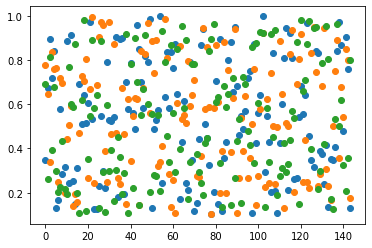

In [65]:
plt.plot(matches.cL1, 'o')
plt.plot(matches.cL2, 'o')
plt.plot(matches.cL3, 'o')
plt.show()

In [15]:
labels = ['cu1', 'cu2', 'cu3', 'cd1', 'cd2', 'cd3', 'cL1', 'cL2', 'cL3']
for label in labels:
    print(label, np.average(matches[label]), np.std(matches[label]))

cu1 0.5179262406523777 0.24525984684304922
cu2 0.5482782941008829 0.24424596079248523
cu3 0.5228865272363387 0.23865504439554586
cd1 0.5658626027418566 0.25891443273084636
cd2 0.5773338572010495 0.2731264342167016
cd3 0.5322630549100916 0.24450712290315532
cL1 0.5448394737637807 0.2676814844124197
cL2 0.5468716286091311 0.2618584063407865
cL3 0.5211965651811341 0.27005741686619344


In [20]:
labels = ['yu11', 'yu12', 'yu13', 
          'yu21', 'yu22', 'yu33', 
          'yu31', 'yu32', 'yu33']
for label in labels:
    print(label, np.average(matches[label]), np.std(matches[label]))

yu11 1.9014882036816434 1.5163821887711106
yu12 1.8419207832585975 1.509797145468289
yu13 2.0255777824865677 1.4725986700890663
yu21 1.6005941854981787 1.3983337710754355
yu22 1.503401701504474 1.3678519340322226
yu33 1.6071524696026849 1.4510357035651786
yu31 1.4276224502142292 1.3142565480012773
yu32 1.4522790426734113 1.3379644917028783
yu33 1.6071524696026849 1.4510357035651786


In [21]:
labels = ['yd11', 'yd12', 'yd13', 
          'yd21', 'yd22', 'yd33', 
          'yd31', 'yd32', 'yd33']
for label in labels:
    print(label, np.average(matches[label]), np.std(matches[label]))

yd11 0.43731080934274125 0.23877892044031615
yd12 0.2820022745501616 0.3156746461667886
yd13 0.2172908849424562 0.2676977138536494
yd21 2.1332870199678937 1.4171061317776235
yd22 1.3443248877510763 1.0700976883502298
yd33 0.40011215397387556 0.19839916857895207
yd31 0.7592922969764343 0.4213695094977104
yd32 0.6657073312943411 0.422182031801582
yd33 0.40011215397387556 0.19839916857895207


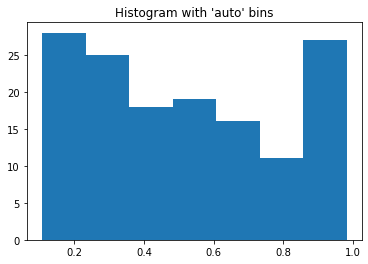

In [19]:
dat = matches.cL3
plt.hist(dat, bins=7)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

## Predicting outcome from initial starting point

In [22]:
np.average(data[data.outcome==0].chi_squared)

35540112.493836805

In [23]:
np.average(data[data.outcome==1].chi_squared)

22454887.54373814

In [24]:
np.average(data[data.outcome==2].chi_squared)

33971953.62897249

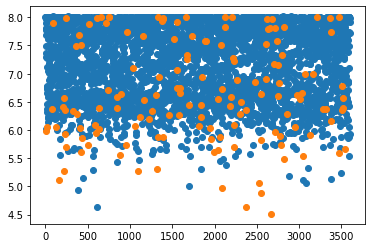

In [27]:
plt.plot(np.log10(data[data.outcome!=1].chi_squared), 'o')
plt.plot(np.log10(data[data.outcome==1].chi_squared), 'o')
plt.show()

### Processing data

In [28]:
# group 0 and 2 together as 0
X = data.loc[:, data.columns != 'outcome'].copy()
Y = data['outcome'].copy()

# relabel Y axis to binary
Y[Y == 2] = 0
# check
# Y.unique()

# Use log10 scale for X axis
X.chi_squared = np.log10(X.chi_squared)

Train test splitting (80-20)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=20)

### Base line model: Logistic Regression

In [30]:
lm = LogisticRegression(max_iter=1000)
lm.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
lm.score(x_train, y_train)

0.9631944444444445

In [32]:
lm.score(x_test, y_test)

0.95

In [33]:
y_test_pred = lm.predict(x_test)

In [34]:
cm = confusion_matrix(y_test, y_test_pred)

In [35]:
cm

array([[684,   0],
       [ 36,   0]])

In [36]:
print(np.sum(y_test == 0))
print(np.sum(y_test == 1))

684
36


The model is imbalanced, thus not useful. 

In [37]:
f1_score(y_test, y_test_pred)

0.0

### Logistic Regression with SMOTE

In [38]:
smk = SMOTETomek()
x_smote, y_smote = smk.fit_resample(x_train, y_train)

In [39]:
lm2 = LogisticRegression(max_iter=1000)
lm2.fit(x_smote, y_smote)

LogisticRegression(max_iter=1000)

In [40]:
print(lm.score(x_smote, y_smote))
print(lm.score(x_test, y_test))

0.5018037518037518
0.95


In [41]:
y_test_pred = lm2.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)

print(f1_score(y_test, y_test_pred))
print(cm)

0.1328125
[[481 203]
 [ 19  17]]


### Gradient Boosting with SMOTE

In [52]:
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01,
                                 max_depth=2, random_state=1).fit(x_smote, y_smote)
#ada_clf = AdaBoostClassifier(n_estimators=300, learning_rate=1.0,
#                         random_state=0).fit(x_smote, y_smote)
print(clf.score(x_smote, y_smote))
print(clf.score(x_test, y_test))

0.8414502164502164
0.7833333333333333


In [53]:
y_train_pred = clf.predict(x_smote)
cm_train = confusion_matrix(y_smote, y_train_pred)
fpr, tpr, thresholds = roc_curve(y_smote, y_train_pred)

print(f1_score(y_smote, y_train_pred))
print(auc(fpr, tpr))
print(cm_train)

0.8444523093257829
0.8414502164502164
[[2279  493]
 [ 386 2386]]


In [54]:
y_test_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

print(f1_score(y_test, y_test_pred))
print(auc(fpr, tpr))
print(cm)

0.15217391304347827
0.5964912280701754
[[550 134]
 [ 22  14]]


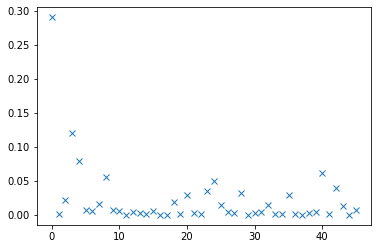

In [58]:
plt.plot(clf.feature_importances_, 'x')

In [56]:
import joblib

In [61]:
joblib.dump(clf, '../output/test_model.pkl', compress=9)

['../output/test_model.pkl']

### Logistic Regression with Oversampling

In [62]:
model_clone = joblib.load('../output/test_model.pkl')

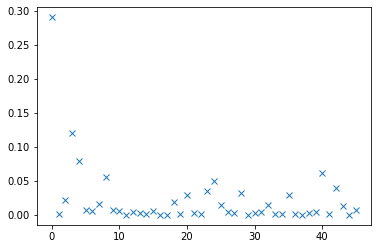

In [63]:
plt.plot(model_clone.feature_importances_, 'x')